# Web Scraping - Lab

## Introduction

Now that you've seen a more extensive example of developing a web scraping script, it's time to further practice and formalize that knowledge by writing functions to parse specific pieces of information from the web page and then synthesizing these into a larger loop that will iterate over successive web pages in order to build a complete dataset.

## Objectives

You will be able to:

* Navigate HTML documents using Beautiful Soup's children and sibling relations
* Select specific elements from HTML using Beautiful Soup
* Use regular expressions to extract items with a certain pattern within Beautiful Soup
* Determine the pagination scheme of a website and scrape multiple pages

## Lab Overview

This lab will build upon the previous lesson. In the end, you'll look to write a script that will iterate over all of the pages for the demo site and extract the title, price, star rating and availability of each book listed. Building up to that, you'll formalize the concepts from the lesson by writing functions that will extract a list of each of these features for each web page. You'll then combine these functions into the full script which will look something like this:  

```python
df = pd.DataFrame()
for i in range(2,51):
    url = "http://books.toscrape.com/catalogue/page-{}.html".format(i)
    soup = BeautifulSoup(html_page.content, 'html.parser')
    new_titles = retrieve_titles(soup)
    new_star_ratings = retrieve_ratings(soup)
    new_prices = retrieve_prices(soup)
    new_avails = retrieve_avails(soup)
    ...
 ```

## Retrieving Titles

To start, write a function that extracts the titles of the books on a given page. The input for the function should be the `soup` for the HTML of the page.

In [29]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib as plt

In [2]:
url = "http://books.toscrape.com/catalogue/page-1.html"
html_page = requests.get(url)
soup = BeautifulSoup(html_page.content, 'html.parser')

In [3]:
soup.prettify

<bound method Tag.prettify of 
<!DOCTYPE html>

<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-us"> <!--<![endif]-->
<head>
<title>
    All products | Books to Scrape - Sandbox
</title>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="24th Jun 2016 09:30" name="created"/>
<meta content="" name="description"/>
<meta content="width=device-width" name="viewport"/>
<meta content="NOARCHIVE,NOCACHE" name="robots"/>
<!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
<!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
<link href="../static/oscar/favicon.ico" rel="shortcut icon"/>
<link href="../static/oscar/css/styles.css" rel="styles

In [4]:
soup.find_all('a')

[<a href="../index.html">Books to Scrape</a>,
 <a href="../index.html">Home</a>,
 <a href="category/books_1/index.html">
                             
                                 Books
                             
                         </a>,
 <a href="category/books/travel_2/index.html">
                             
                                 Travel
                             
                         </a>,
 <a href="category/books/mystery_3/index.html">
                             
                                 Mystery
                             
                         </a>,
 <a href="category/books/historical-fiction_4/index.html">
                             
                                 Historical Fiction
                             
                         </a>,
 <a href="category/books/sequential-art_5/index.html">
                             
                                 Sequential Art
                             
                         <

In [5]:
titles = []
for x in soup.find_all('a'):
    try:
        titles.append(x['title'])
    except:
        continue

In [6]:
def retrieve_titles(soup):
    # Your code here
    titles = []
    for x in soup.find_all('a'):
        try:
            titles.append(x['title'])
        except:
            continue
    return titles

In [7]:
len(titles)

20

## Retrieve Ratings

Next, write a similar function to retrieve the star ratings on a given page. Again, the function should take in the `soup` from the given HTML page and return a list of the star ratings for the books. These star ratings should be formatted as integers.

In [8]:
import re

In [9]:
regex = re.compile("star-rating (.*)")

In [10]:
soup.find_all("p", {"class" : regex})

[<p class="star-rating Three">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 </p>, <p class="star-rating One">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 </p>, <p class="star-rating One">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 </p>, <p class="star-rating Four">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 </p>, <p class="star-rating Five">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 </p>, <p class="star-rating One">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class

In [11]:
soup.find_all('p', {'class' : regex})[1].get('class')

['star-rating', 'One']

In [12]:
num_dict = {'One' : 1, 'Two' : 2, 'Three' : 3, 'Four' : 4, 'Five' : 5}

In [13]:
num_dict['Three']

3

In [14]:
ratings = []
for x in soup.find_all('p', {'class' : regex}):
    ratings.append(num_dict[x.get('class')[1]])
    ratings.append(x.get('class')[1])

In [15]:
def retrieve_ratings(soup):
    ratings = []
    num_dict = {'One' : 1, 'Two' : 2, 'Three' : 3, 'Four' : 4, 'Five' : 5}
    for x in soup.find_all('p', {'class' : regex}):
       ratings.append(num_dict[x.get('class')[1]])
    return ratings

## Retrieve Prices

Now write a function to retrieve the prices on a given page. The function should take in the `soup` from the given page and return a list of prices formatted as floats.

In [16]:
float(soup.find_all('p', class_ = 'price_color')[0].text[1:])

51.77

In [17]:
prices = []
for x in (soup.find_all('p', class_ = 'price_color')):
    prices.append((float(x.text[1:])))

In [18]:
len(prices)

20

In [19]:
def retrieve_prices(soup):
    prices = []
    for x in (soup.find_all('p', class_ = 'price_color')):
        prices.append((float(x.text[1:])))
    return prices

# Retrieve Availability

Write a function to retrieve whether each book is available or not. The function should take in the `soup` from a given html page and return a list of the availability for each book.

In [20]:
soup.find_all('p', class_ = 'instock availability')[0].text[1:].strip()

'In stock'

In [21]:
availability = []
for x in soup.find_all('p', class_ = 'instock availability'):
    availability.append(x.text.strip())
    
print(len(availability))

20


In [22]:
def retrieve_availabilities(soup):
    #Your code here
    availability = []
    for x in soup.find_all('p', class_ = 'instock availability'):
        availability.append(x.text.strip())
    return availability

## Create a Script to Retrieve All the Books From All 50 Pages

Finally, write a script to retrieve all of the information from all 50 pages of the books.toscrape.com website. 

In [23]:
url = "http://books.toscrape.com/catalogue/page-1.html"
html_page = requests.get(url)
soup = BeautifulSoup(html_page.content, 'html.parser')

titles = retrieve_titles(soup)
ratings = retrieve_ratings(soup)
price = retrieve_prices(soup)
avail = retrieve_availabilities(soup)


In [24]:
print(len(price))

20


In [27]:
df = pd.DataFrame({'titles' : titles,
                  'ratings' : ratings,
                  'price' :  price,
                  'avail' : avail})

In [28]:
df

,titles,ratings,price,avail
0,A Light in the Attic,3,51.77,In stock
1,Tipping the Velvet,1,53.74,In stock
2,Soumission,1,50.10,In stock
3,Sharp Objects,4,47.82,In stock
4,Sapiens: A Brief History of Humankind,5,54.23,In stock
5,The Requiem Red,1,22.65,In stock
6,The Dirty Little Secrets of Getting Your Dream...,4,33.34,In stock
7,The Coming Woman: A Novel Based on the Life of...,3,17.93,In stock
8,The Boys in the Boat: Nine Americans and Their...,4,22.60,In stock
9,The Black Maria,1,52.15,In stock


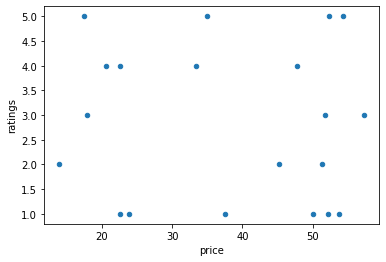

In [33]:
df.plot( x = 'price', y = 'ratings', kind = 'scatter')
plt;

In [34]:
total_titles = []
total_ratings = []
total_price = []
total_avail = []

for num in range(1, 51):
    if num % 5 == 0:
        print(num)
    url = f"http://books.toscrape.com/catalogue/page-{num}.html"
    html_page = requests.get(url)
    soup = BeautifulSoup(html_page.content, 'html.parser')
    
    titles = retrieve_titles(soup)
    ratings = retrieve_ratings(soup)
    price = retrieve_prices(soup)
    avail = retrieve_availabilities(soup)
    
    total_titles += titles
    total_ratings += ratings
    total_price += price
    total_avail += avail

5
10
15
20
25
30
35
40
45
50


In [36]:
df = pd.DataFrame({'titles' : total_titles,
                  'ratings' : total_ratings,
                  'price' :  total_price,
                  'avail' : total_avail})

In [39]:
df.head()

,titles,ratings,price,avail
0,A Light in the Attic,3,51.77,In stock
1,Tipping the Velvet,1,53.74,In stock
2,Soumission,1,50.10,In stock
3,Sharp Objects,4,47.82,In stock
4,Sapiens: A Brief History of Humankind,5,54.23,In stock


In [48]:
df[df['titles'] == 'A Light in the Attic']

,titles,ratings,price,avail
0,A Light in the Attic,3,51.77,In stock


<AxesSubplot:xlabel='price', ylabel='ratings'>

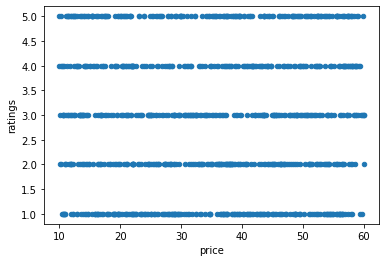

In [49]:
df.plot(kind = 'scatter', x = 'price', y = 'ratings')

<AxesSubplot:xlabel='ratings', ylabel='price'>

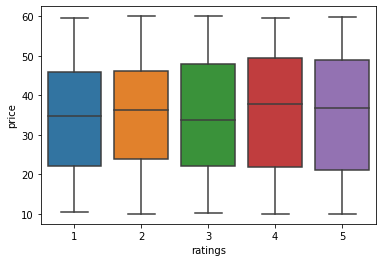

In [51]:
import seaborn as sns
sns.boxplot(x = 'ratings', y = 'price', data = df)

## Level-Up: Write a new version of the script you just wrote. 

If you used URL hacking to generate each successive page URL, instead write a function that retrieves the link from the `"next"` button at the bottom of the page. Conversely, if you already used this approach above, use URL-hacking (arguably the easier of the two methods in this case).

In [57]:
url = "http://books.toscrape.com/catalogue/page-1.html"
html_page = requests.get(url)
soup = BeautifulSoup(html_page.content, 'html.parser')

In [61]:
soup.find('li', class_ = 'next').find('a')['href']

'page-2.html'

In [72]:
total_titles = []
total_ratings = []
total_price = []
total_avail = []


initial_url = 'page-1.html'
while True:
    url = f"http://books.toscrape.com/catalogue/{initial_url}"
    html_page = requests.get(url)
    soup = BeautifulSoup(html_page.content, 'html.parser')
    #initial_url = soup.find('li', class_ = 'next').find('a')['href']
    print(initial_url)
    titles = retrieve_titles(soup)
    ratings = retrieve_ratings(soup)
    price = retrieve_prices(soup)
    avail = retrieve_availabilities(soup)
    
    total_titles += titles
    total_ratings += ratings
    total_price += price
    total_avail += avail
    try:
        initial_url = soup.find('li', class_ = 'next').find('a')['href']
    except:
        break

page-1.html
page-2.html
page-3.html
page-4.html
page-5.html
page-6.html
page-7.html
page-8.html
page-9.html
page-10.html
page-11.html
page-12.html
page-13.html
page-14.html
page-15.html
page-16.html
page-17.html
page-18.html
page-19.html
page-20.html
page-21.html
page-22.html
page-23.html
page-24.html
page-25.html
page-26.html
page-27.html
page-28.html
page-29.html
page-30.html
page-31.html
page-32.html
page-33.html
page-34.html
page-35.html
page-36.html
page-37.html
page-38.html
page-39.html
page-40.html
page-41.html
page-42.html
page-43.html
page-44.html
page-45.html
page-46.html
page-47.html
page-48.html
page-49.html
page-50.html


In [73]:
df1 = pd.DataFrame({'titles' : total_titles,
                  'ratings' : total_ratings,
                  'price' :  total_price,
                  'avail' : total_avail})

In [74]:
df1

,titles,ratings,price,avail
0,A Light in the Attic,3,51.77,In stock
1,Tipping the Velvet,1,53.74,In stock
2,Soumission,1,50.10,In stock
3,Sharp Objects,4,47.82,In stock
4,Sapiens: A Brief History of Humankind,5,54.23,In stock
...,...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,1,55.53,In stock
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",4,57.06,In stock
997,A Spy's Devotion (The Regency Spies of London #1),5,16.97,In stock
998,1st to Die (Women's Murder Club #1),1,53.98,In stock


In [76]:
df1.head()

,titles,ratings,price,avail
0,A Light in the Attic,3,51.77,In stock
1,Tipping the Velvet,1,53.74,In stock
2,Soumission,1,50.10,In stock
3,Sharp Objects,4,47.82,In stock
4,Sapiens: A Brief History of Humankind,5,54.23,In stock


In [77]:
df.head()

,titles,ratings,price,avail
0,A Light in the Attic,3,51.77,In stock
1,Tipping the Velvet,1,53.74,In stock
2,Soumission,1,50.10,In stock
3,Sharp Objects,4,47.82,In stock
4,Sapiens: A Brief History of Humankind,5,54.23,In stock


In [78]:
df1.tail()

,titles,ratings,price,avail
995,Alice in Wonderland (Alice's Adventures in Won...,1,55.53,In stock
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",4,57.06,In stock
997,A Spy's Devotion (The Regency Spies of London #1),5,16.97,In stock
998,1st to Die (Women's Murder Club #1),1,53.98,In stock
999,"1,000 Places to See Before You Die",5,26.08,In stock


In [80]:
df.tail()

,titles,ratings,price,avail
995,Alice in Wonderland (Alice's Adventures in Won...,1,55.53,In stock
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",4,57.06,In stock
997,A Spy's Devotion (The Regency Spies of London #1),5,16.97,In stock
998,1st to Die (Women's Murder Club #1),1,53.98,In stock
999,"1,000 Places to See Before You Die",5,26.08,In stock


## Summary

Well done! You just completed your first full web scraping project! You're ready to start harnessing the power of the web!